In [1]:
import math as m
import sys
import numpy as np
from numpy import cos
from numpy import pi
np.set_printoptions(threshold=sys.maxsize)
from scipy import linalg as LA
from ipynb.fs.full.UCC import *
from ipynb.fs.full.HAM import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
def groundstate(U): #get ground state
    #tol = 0.4
    eigenValues, eigenVectors = LA.eig(hamm(U))
    eigenVectors = eigenVectors.real
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    ground_state = eigenVectors.transpose()[0]
    if U == 0:
        ground_state = uccket
    return ground_state

def groundenergy(U): #get ground state
    #tol = 0.4
    eigenValues, eigenVectors = LA.eig(hamm(U))
    eigenVectors = eigenVectors.real
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues[0]

def firstexcited(U): #get ground state
    #tol = 0.4
    eigenValues, eigenVectors = LA.eig(hamm(U))
    eigenVectors = eigenVectors.real
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues[1]

In [3]:
#create raw ucc lists
possibles = singles(1)+singles(22)
#ucc_matrix = np.zeros([36,36],dtype=np.int32)
print(possibles)
ucc_singles = np.zeros([len(possibles),len(basis),len(basis)])

possibled = double(1)+double(22)
print(possibled)
ucc_doubles = np.zeros([len(possibled),len(basis),len(basis)])
len(possibles)

possiblet = triples(1) + triples(22)
print(possiblet)
ucc_triples = np.zeros([len(possiblet), len(basis), len(basis)])

possibleq = quads(1) + quads(6) +quads(11) +quads(15) +quads(16) +quads(21) +quads(22) +quads(26) +quads(31) + quads(36) 
print(possibleq)
ucc_quads = np.zeros([len(possibleq), len(basis), len(basis)])

[[-1, '13'], [-1, '25'], [1, '7'], [1, '19'], [-1, '3'], [-1, '5'], [1, '2'], [1, '4'], [1, '28'], [1, '34'], [1, '4'], [1, '10'], [1, '23'], [1, '24'], [1, '19'], [1, '20']]
[[-1, '15'], [-1, '17'], [-1, '27'], [-1, '29'], [1, '14'], [1, '16'], [1, '26'], [1, '28'], [1, '9'], [1, '11'], [1, '21'], [1, '23'], [-1, '8'], [-1, '10'], [-1, '20'], [-1, '22'], [-1, '6'], [-1, '31'], [-1, '29'], [-1, '30'], [-1, '35'], [-1, '36'], [-1, '25'], [-1, '26'], [-1, '31'], [-1, '32'], [-1, '5'], [-1, '6'], [-1, '11'], [-1, '12'], [-1, '1'], [-1, '2'], [-1, '7'], [-1, '8'], [-1, '21'], [-1, '16']]
[[1, '18'], [1, '30'], [-1, '12'], [-1, '24'], [1, '33'], [1, '35'], [-1, '32'], [-1, '34'], [-1, '27'], [-1, '33'], [-1, '3'], [-1, '9'], [-1, '17'], [-1, '18'], [-1, '13'], [-1, '14']]
[[1, '36'], [1, '31'], [1, '26'], [1, '22'], [1, '21'], [1, '16'], [1, '15'], [1, '11'], [1, '6'], [1, '1']]


In [4]:
poss = 0
posd = 0
post = 0
posq = 0

for i in range(8):
    poss = int(possibles[i][1])
    ucc_singles[i][0][poss-1] = int(possibles[i][0])
    ucc_singles[i] = ucc_singles[i] - ucc_singles[i].transpose()
    #ucc_singles[i] = ucc_singles[i] / LA.norm(ucc_singles[i])
    
for i in range(8):
    poss = int(possibles[i+8][1])
    ucc_singles[i+8][21][poss-1] = int(possibles[i+8][0])
    ucc_singles[i+8] = ucc_singles[i+8] - ucc_singles[i+8].transpose()
    #ucc_singles[i] = ucc_singles[i] / LA.norm(ucc_singles[i])
        
for i in range(18):
    posd = int(possibled[i][1])
    ucc_doubles[i][0][posd-1] = int(possibled[i][0])
    ucc_doubles[i] = ucc_doubles[i] - ucc_doubles[i].transpose()
    #ucc_doubles[i] = ucc_doubles[i] / LA.norm(ucc_doubles[i])
for i in range(18):
    posd = int(possibled[i+18][1])
    ucc_doubles[i+18][21][posd-1] = int(possibled[i+18][0])
    ucc_doubles[i+18] = ucc_doubles[i+18] - ucc_doubles[i+18].transpose()
    #ucc_doubles[i] = ucc_doubles[i] / LA.norm(ucc_doubles[i])
    
for i in range(4):
    post = int(possiblet[i][1])
    ucc_triples[i][0][post-1] = int(possiblet[i][0])
    ucc_triples[i] = ucc_triples[i] - ucc_triples[i].transpose()
    #ucc_singles[i] = ucc_singles[i] / LA.norm(ucc_singles[i])
    
for i in range(4):
    post = int(possiblet[i+4][1])
    ucc_triples[i+4][21][post-1] = int(possiblet[i+4][0])
    ucc_triples[i+4] = ucc_triples[i+4] - ucc_triples[i+4].transpose()
    #ucc_singles[i] = ucc_singles[i] / LA.norm(ucc_singles[i])


posq = int(possibleq[0][1])
ucc_quads[0][0][posq-1] = int(possibleq[0][0])
ucc_quads[0] = ucc_quads[0] - ucc_quads[0].transpose()
posq = int(possibleq[1][1])
ucc_quads[1][5][posq-1] = int(possibleq[1][0])
ucc_quads[1] = ucc_quads[1] - ucc_quads[1].transpose()
posq = int(possibleq[2][1])
ucc_quads[2][10][posq-1] = int(possibleq[2][0])
ucc_quads[2] = ucc_quads[2] - ucc_quads[2].transpose()
posq = int(possibleq[3][1])
ucc_quads[3][14][posq-1] = int(possibleq[3][0])
ucc_quads[3] = ucc_quads[3] - ucc_quads[3].transpose()
posq = int(possibleq[4][1])
ucc_quads[4][15][posq-1] = int(possibleq[4][0])
ucc_quads[4] = ucc_quads[4] - ucc_quads[4].transpose()
posq = int(possibleq[5][1])
ucc_quads[5][20][posq-1] = int(possibleq[5][0])
ucc_quads[5] = ucc_quads[5] - ucc_quads[5].transpose()
posq = int(possibleq[6][1])
ucc_quads[6][21][posq-1] = int(possibleq[6][0])
ucc_quads[6] = ucc_quads[6] - ucc_quads[6].transpose()
posq = int(possibleq[7][1])
ucc_quads[7][25][posq-1] = int(possibleq[7][0])
ucc_quads[7] = ucc_quads[7] - ucc_quads[7].transpose()
posq = int(possibleq[8][1])
ucc_quads[8][30][posq-1] = int(possibleq[8][0])
ucc_quads[8] = ucc_quads[8] - ucc_quads[8].transpose()
posq = int(possibleq[9][1])
ucc_quads[9][35][posq-1] = int(possibleq[9][0])
ucc_quads[9] = ucc_quads[9] - ucc_quads[9].transpose()

In [5]:
#CHECK
'''
for i in range(len(possibles)):
    print(i)
    print(ucc_singles[i])
    print('\n')
'''
'''
for i in range(len(possibled)):
    print(i)
    print(ucc_doubles[i])
    print('\n')
'''    
uccket = groundstate(0.001)
uccket = uccket / LA.norm(uccket)

In [6]:
def appsg(vector):
    exponent = np.zeros([len(basis),len(basis)],dtype=float)
    fexp = np.zeros([len(basis),len(basis)],dtype=float)
    exp_total = np.identity(len(basis),dtype=float)
    theta = list(vector)
    for i in range(len(theta)):
        exponent = theta[i] * ucc_singles[i]
        fexp = LA.expm(exponent)
        #fexp = np.nan_to_num(fexp)
        exp_total *= fexp
    return np.dot(exp_total, uccket)

def appdb(vector):
    exp_total = np.identity(len(basis))
    exponent = np.zeros([len(basis),len(basis)])
    theta = list(vector)
    #for i in range(len(theta)):
        #exp_total *= LA.expm(theta[i] * ucc_doubles[i])
        
    for i in range(len(theta)):
        exponent += theta[i] * ucc_doubles[i]
    #print(exp_total)
    return LA.expm(exponent) #np.dot(LA.expm(exponent), uccket)

def apptp(vector):
    exp_total = np.identity(len(basis))
    exponent = np.zeros([len(basis),len(basis)])
    theta = list(vector)
        
    for i in range(len(theta)):
        exponent += theta[i] * ucc_triples[i]
    #print(exp_total)
    return LA.expm(exponent)

def appqp(vector):
    exp_total = np.identity(len(basis))
    exponent = np.zeros([len(basis),len(basis)])
    theta = list(vector)
        
    for i in range(len(theta)):
        exponent += theta[i] * ucc_quads[i]
    #print(exp_total)
    return LA.expm(exponent)

In [7]:
'''
stepsize = 0.01
anglelist = np.arange(0, 2*pi, stepsize)
def bestsg(U):
    #hamiltonian = hamm(U)
    
    energy = np.zeros([len(possibles), len(anglelist)])
    angles = np.zeros(len(possibles))
    overlap = np.zeros([len(possibles), len(anglelist)])
    for i in range(len(possibles)):
        if i != 6:
            for j in range(len(anglelist)):
                angles[i] = anglelist[j]
                overlap[i][j] = np.dot(gs_vector[U],appsg(angles)) ** 2
                #psi = np.dot(hamiltonian, appsg(angles))
                #energy[i][j] = np.dot(appsg(angles),psi)
        
        index = np.argmax(overlap[i])
        #e_index = np.argmin(energy[i])
        #print(np.amin(energy[i]))
        angles[i] = anglelist[index]
        #angles[i] = anglelist[e_index]
        #print(np.amax(energy[i]))
        #print(np.amax(overlap[i]))
        #print(overlap[i][e_index])
        #print(overlap[i][index])
    angles_new = angles
    overlap_new = 0.0
    for i in range(len(possibles)):
        if i >= 1 and i < (len(possibles)-1):
            angles_new[i] = (angles[i-1] + angles[i+1]) / 2.0
        overlap_new = np.dot(gs_vector[U],appsg(angles_new)) ** 2
        #psi = np.dot(hamiltonian, appsg(angles))
        #energy[i][j] = np.dot(appsg(angles),psi)
        if overlap_new > np.amax(overlap[i]):
            angles[i] = angles_new[i]
            overlap[i] = overlap_new
    return angles, overlap, energy

def bestdb(U):
    #hamiltonian = hamm(U)
    ket = appsg(bestsg(U)[0])

    energy = np.zeros([len(possibled), len(anglelist)])
    angles = np.zeros(len(possibled))
    overlap = np.zeros([len(possibled), len(anglelist)])
    for i in range(len(possibled)):
        for j in range(len(anglelist)):
            angles[i] = anglelist[j]
            overlap[i][j] = np.dot(gs_vector[U],appdb(angles,ket)) ** 2
            #psi = np.dot(hamiltonian, appdb(angles))
            #energy[i][j] = np.dot(appdb(angles),psi)
        
        #e_index = np.argmin(energy[i])
        index = np.argmax(overlap[i])
        angles[i] = anglelist[index]
        #angles[i] = anglelist[e_index]
        #print(np.amax(overlap[i]))
    angles_new = angles
    overlap_new = 0.0
    for i in range(len(possibled)):
        if i >= 1 and i < (len(possibled)-1):
            angles_new[i] = (angles[i-1] + angles[i+1]) / 2.0
        overlap_new = np.dot(gs_vector[U],appdb(angles_new,ket)) ** 2
        #psi = np.dot(hamiltonian, appsg(angles))
        #energy[i][j] = np.dot(appsg(angles),psi)
        if overlap_new > np.amax(overlap[i]):
            angles[i] = angles_new[i]
            overlap[i] = overlap_new
    return angles, overlap, energy
'''    

'\nstepsize = 0.01\nanglelist = np.arange(0, 2*pi, stepsize)\ndef bestsg(U):\n    #hamiltonian = hamm(U)\n    \n    energy = np.zeros([len(possibles), len(anglelist)])\n    angles = np.zeros(len(possibles))\n    overlap = np.zeros([len(possibles), len(anglelist)])\n    for i in range(len(possibles)):\n        if i != 6:\n            for j in range(len(anglelist)):\n                angles[i] = anglelist[j]\n                overlap[i][j] = np.dot(gs_vector[U],appsg(angles)) ** 2\n                #psi = np.dot(hamiltonian, appsg(angles))\n                #energy[i][j] = np.dot(appsg(angles),psi)\n        \n        index = np.argmax(overlap[i])\n        #e_index = np.argmin(energy[i])\n        #print(np.amin(energy[i]))\n        angles[i] = anglelist[index]\n        #angles[i] = anglelist[e_index]\n        #print(np.amax(energy[i]))\n        #print(np.amax(overlap[i]))\n        #print(overlap[i][e_index])\n        #print(overlap[i][index])\n    angles_new = angles\n    overlap_new = 0.0\n 

In [8]:
'''
best_singles = np.zeros([nstep, len(possibles)])
singles_overlap = np.zeros(nstep)
singles_energy = np.zeros(nstep)
#singles_list = []
for i in range(nstep):
    print(i)
    best_singles[i] = bestsg(i)[0]
    singles_overlap[i] = np.amax(bestsg(i)[1])
    #singles_energy[i] = np.amin(bestsg(i)[2])
best_singles = best_singles.transpose()
best_singles = best_singles % np.pi
'''

'\nbest_singles = np.zeros([nstep, len(possibles)])\nsingles_overlap = np.zeros(nstep)\nsingles_energy = np.zeros(nstep)\n#singles_list = []\nfor i in range(nstep):\n    print(i)\n    best_singles[i] = bestsg(i)[0]\n    singles_overlap[i] = np.amax(bestsg(i)[1])\n    #singles_energy[i] = np.amin(bestsg(i)[2])\nbest_singles = best_singles.transpose()\nbest_singles = best_singles % np.pi\n'

In [9]:
'''
best_doubles = np.zeros([nstep+1, len(possibled)])
doubles_overlap = np.zeros(nstep+1)
doubles_energy = np.zeros(nstep+1)
#doubles_list = []
for i in range(nstep+1):
    print(i)
    #doubles_list = bestdb(i)
    best_doubles[i] = bestdb(i)[0]
    doubles_overlap[i] = np.amax(bestdb(i)[1])
    #doubles_energy[i] = np.amin(bestdb(i)[2])
best_doubles = best_doubles.transpose()
best_doubles = best_doubles % np.pi
'''

'\nbest_doubles = np.zeros([nstep+1, len(possibled)])\ndoubles_overlap = np.zeros(nstep+1)\ndoubles_energy = np.zeros(nstep+1)\n#doubles_list = []\nfor i in range(nstep+1):\n    print(i)\n    #doubles_list = bestdb(i)\n    best_doubles[i] = bestdb(i)[0]\n    doubles_overlap[i] = np.amax(bestdb(i)[1])\n    #doubles_energy[i] = np.amin(bestdb(i)[2])\nbest_doubles = best_doubles.transpose()\nbest_doubles = best_doubles % np.pi\n'

In [10]:
'''
for i in range(len(best_singles)):
    for j in range(len(u_list)):
        
        if (best_singles[i][j] > 2.7):
            best_singles[i][j] = abs(best_singles[i][j] - np.pi)
'''
'''
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.yticks(np.arange(0,4,step=np.pi/8))
ax2 = ax1.twinx()
ax1.plot(u_list, best_singles[0], label = 'Singles 0')
ax1.plot(u_list, best_singles[1], label = 'Singles 1')
ax1.plot(u_list, best_singles[2], label = 'Singles 2')
ax1.plot(u_list, best_singles[3], label = 'Singles 3')
ax1.plot(u_list, best_singles[4], label = 'Singles 4')
ax1.plot(u_list, best_singles[5], label = 'Singles 5')
ax1.plot(u_list, best_singles[6], label = 'Singles 6')
ax1.plot(u_list, best_singles[7], label = 'Singles 7')
ax2.plot(u_list, singles_overlap, 'x')
#ax2.plot(u_list, singles_energy, 'x')
ax1.set_ylabel('Rz angles')
ax2.set_ylabel('Overlap squared')
ax1.set_xlabel('U')
plt.title('Singles angles/overlaps squared')
#plt.legend()
plt.show()
'''

"\nfig, ax1 = plt.subplots(figsize=(18, 10))\nplt.yticks(np.arange(0,4,step=np.pi/8))\nax2 = ax1.twinx()\nax1.plot(u_list, best_singles[0], label = 'Singles 0')\nax1.plot(u_list, best_singles[1], label = 'Singles 1')\nax1.plot(u_list, best_singles[2], label = 'Singles 2')\nax1.plot(u_list, best_singles[3], label = 'Singles 3')\nax1.plot(u_list, best_singles[4], label = 'Singles 4')\nax1.plot(u_list, best_singles[5], label = 'Singles 5')\nax1.plot(u_list, best_singles[6], label = 'Singles 6')\nax1.plot(u_list, best_singles[7], label = 'Singles 7')\nax2.plot(u_list, singles_overlap, 'x')\n#ax2.plot(u_list, singles_energy, 'x')\nax1.set_ylabel('Rz angles')\nax2.set_ylabel('Overlap squared')\nax1.set_xlabel('U')\nplt.title('Singles angles/overlaps squared')\n#plt.legend()\nplt.show()\n"

In [11]:
'''
plt.ylabel('Rz angles')
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.yticks(np.arange(0,3*np.pi/2,step=np.pi/8))
ax2 = ax1.twinx()
ax1.plot(u_list, best_doubles[0], '.', label = 'Doubles 0')
ax1.plot(u_list, best_doubles[1], '.', label = 'Doubles 1')
ax1.plot(u_list, best_doubles[2], '.', label = 'Doubles 2')
ax1.plot(u_list, best_doubles[3], '.', label = 'Doubles 3')
ax1.plot(u_list, best_doubles[4], '.', label = 'Doubles 4')
ax1.plot(u_list, best_doubles[5], '.', label = 'Doubles 5')
ax1.plot(u_list, best_doubles[6], '.', label = 'Doubles 6')
ax1.plot(u_list, best_doubles[7], '.', label = 'Doubles 7')
ax1.plot(u_list, best_doubles[8], '.', label = 'Doubles 8')
ax1.plot(u_list, best_doubles[9], '.', label = 'Doubles 9')
ax1.plot(u_list, best_doubles[10], '.', label = 'Doubles 10')
ax1.plot(u_list, best_doubles[11], '.', label = 'Doubles 11')
ax1.plot(u_list, best_doubles[12], '.', label = 'Doubles 12')
ax1.plot(u_list, best_doubles[13], '.', label = 'Doubles 13')
ax1.plot(u_list, best_doubles[14], '.', label = 'Doubles 14')
ax1.plot(u_list, best_doubles[15], '.', label = 'Doubles 15')
ax1.plot(u_list, best_doubles[16], '.', label = 'Doubles 16')
ax1.plot(u_list, best_doubles[17], '.', label = 'Doubles 17')

ax2.plot(u_list, doubles_overlap, 'x')
ax1.set_xlabel('U')
ax1.set_ylabel('Rz angles')
ax2.set_ylabel('Overlaps squared')
plt.title('Doubles angles/overlaps squared')
plt.legend()
plt.show()
'''

"\nplt.ylabel('Rz angles')\nfig, ax1 = plt.subplots(figsize=(18, 10))\nplt.yticks(np.arange(0,3*np.pi/2,step=np.pi/8))\nax2 = ax1.twinx()\nax1.plot(u_list, best_doubles[0], '.', label = 'Doubles 0')\nax1.plot(u_list, best_doubles[1], '.', label = 'Doubles 1')\nax1.plot(u_list, best_doubles[2], '.', label = 'Doubles 2')\nax1.plot(u_list, best_doubles[3], '.', label = 'Doubles 3')\nax1.plot(u_list, best_doubles[4], '.', label = 'Doubles 4')\nax1.plot(u_list, best_doubles[5], '.', label = 'Doubles 5')\nax1.plot(u_list, best_doubles[6], '.', label = 'Doubles 6')\nax1.plot(u_list, best_doubles[7], '.', label = 'Doubles 7')\nax1.plot(u_list, best_doubles[8], '.', label = 'Doubles 8')\nax1.plot(u_list, best_doubles[9], '.', label = 'Doubles 9')\nax1.plot(u_list, best_doubles[10], '.', label = 'Doubles 10')\nax1.plot(u_list, best_doubles[11], '.', label = 'Doubles 11')\nax1.plot(u_list, best_doubles[12], '.', label = 'Doubles 12')\nax1.plot(u_list, best_doubles[13], '.', label = 'Doubles 13')\

In [13]:
u_start = 0.0
u_end = 10
nstep = 11
u_list = np.linspace(u_start, u_end, nstep)
gs_vector = []
for i in range(len(u_list)):
    #print(u_list[i])
    gs_vector.append(groundstate(u_list[i]))
'''
gs_vector[4] = gs_vector[4] * (-1)
gs_vector[8] = gs_vector[8] * (-1)
gs_vector[9] = gs_vector[9] * (-1)
gs_vector[10] = gs_vector[10] * (-1)
'''

'\ngs_vector[4] = gs_vector[4] * (-1)\ngs_vector[8] = gs_vector[8] * (-1)\ngs_vector[9] = gs_vector[9] * (-1)\ngs_vector[10] = gs_vector[10] * (-1)\n'

In [14]:
'''
just_singles = []
just_overlap = np.zeros([len(gs_vector), len(ucc_singles)])
for i in range(len(ucc_singles)):
    just_singles.append(np.dot(ucc_singles[i], uccket)) #originally not applied by expm
    just_singles[i] = just_singles[i] / LA.norm(just_singles[i])

for i in range(len(gs_vector)):
    for j in range(len(just_singles)):
        just_overlap[i][j] = np.dot(gs_vector[i], just_singles[j]) ** 2
just_overlap = just_overlap.transpose()

fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(just_overlap)):
    ax1.plot(u_list, just_overlap[i], 'x', label = 'Singles ' + str(i))
ax1.set_ylabel('Overlap squared')
ax1.set_xlabel('U')
#plt.ylim((-0.001, 0.02))
plt.legend()
plt.show()
'''

"\njust_singles = []\njust_overlap = np.zeros([len(gs_vector), len(ucc_singles)])\nfor i in range(len(ucc_singles)):\n    just_singles.append(np.dot(ucc_singles[i], uccket)) #originally not applied by expm\n    just_singles[i] = just_singles[i] / LA.norm(just_singles[i])\n\nfor i in range(len(gs_vector)):\n    for j in range(len(just_singles)):\n        just_overlap[i][j] = np.dot(gs_vector[i], just_singles[j]) ** 2\njust_overlap = just_overlap.transpose()\n\nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(just_overlap)):\n    ax1.plot(u_list, just_overlap[i], 'x', label = 'Singles ' + str(i))\nax1.set_ylabel('Overlap squared')\nax1.set_xlabel('U')\n#plt.ylim((-0.001, 0.02))\nplt.legend()\nplt.show()\n"

In [15]:
'''
sqrt_overlap = np.sqrt(just_overlap)
#sqrt_overlap[7] = 0 #used to be bad, but now good
'''

'\nsqrt_overlap = np.sqrt(just_overlap)\n#sqrt_overlap[7] = 0 #used to be bad, but now good\n'

In [16]:
'''
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(sqrt_overlap)):
    ax1.plot(u_list, sqrt_overlap[i], 'x', label = 'Singles ' + str(i))
ax1.set_ylabel('Angles of the singless')
ax1.set_xlabel('U')
#plt.ylim((-0.001, 0.02))
plt.legend()
plt.show()
'''

"\nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(sqrt_overlap)):\n    ax1.plot(u_list, sqrt_overlap[i], 'x', label = 'Singles ' + str(i))\nax1.set_ylabel('Angles of the singless')\nax1.set_xlabel('U')\n#plt.ylim((-0.001, 0.02))\nplt.legend()\nplt.show()\n"

In [17]:
'''
transpose_sqrt = sqrt_overlap.transpose()
psi_ucc_singles = np.zeros([len(u_list),len(basis)])

for i in range(len(u_list)):
    psi_ucc_singles[i] = appsg(transpose_sqrt[i])
'''

'\ntranspose_sqrt = sqrt_overlap.transpose()\npsi_ucc_singles = np.zeros([len(u_list),len(basis)])\n\nfor i in range(len(u_list)):\n    psi_ucc_singles[i] = appsg(transpose_sqrt[i])\n'

In [18]:
'''
psi_prime = []
for i in range(len(u_list)):
    psi_prime.append(gs_vector[i] - psi_ucc_singles[i])
    #psi_prime[i] = psi_prime[i] / LA.norm(psi_prime[i])
doubles_antz = np.zeros([len(ucc_doubles), len(basis)])
for i in range(len(ucc_doubles)):
    doubles_antz[i] = np.dot(ucc_doubles[i], uccket) #originally not applied by expm
    doubles_antz[i] = doubles_antz[i] / LA.norm(doubles_antz[i])
    
singles_antz = np.zeros([len(ucc_singles), len(basis)])
for i in range(len(ucc_singles)):
    singles_antz[i] = np.dot(ucc_singles[i], uccket) #originally not applied by expm
    singles_antz[i] = singles_antz[i] / LA.norm(singles_antz[i])
    
singles_angles = np.zeros([len(singles_antz), len(psi_ucc_singles)])
for i in range(len(singles_antz)):
    for j in range(len(psi_ucc_singles)):
        singles_angles[i][j] = np.dot(singles_antz[i], psi_ucc_singles[j])
        
doubles_angles = np.zeros([len(doubles_antz), len(psi_prime)])
for i in range(len(doubles_antz)):
    for j in range(len(psi_prime)):
        doubles_angles[i][j] = np.dot(doubles_antz[i], psi_prime[j])
        
#doubles_angles[15] = 0 #Jumping in between our degenerate space, BAD BOY
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(doubles_angles)):
    ax1.plot(u_list, abs(doubles_angles[i]), label = 'Doubles ' + str(i))
ax1.set_ylabel('Angles of the doubles')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()
'''

"\npsi_prime = []\nfor i in range(len(u_list)):\n    psi_prime.append(gs_vector[i] - psi_ucc_singles[i])\n    #psi_prime[i] = psi_prime[i] / LA.norm(psi_prime[i])\ndoubles_antz = np.zeros([len(ucc_doubles), len(basis)])\nfor i in range(len(ucc_doubles)):\n    doubles_antz[i] = np.dot(ucc_doubles[i], uccket) #originally not applied by expm\n    doubles_antz[i] = doubles_antz[i] / LA.norm(doubles_antz[i])\n    \nsingles_antz = np.zeros([len(ucc_singles), len(basis)])\nfor i in range(len(ucc_singles)):\n    singles_antz[i] = np.dot(ucc_singles[i], uccket) #originally not applied by expm\n    singles_antz[i] = singles_antz[i] / LA.norm(singles_antz[i])\n    \nsingles_angles = np.zeros([len(singles_antz), len(psi_ucc_singles)])\nfor i in range(len(singles_antz)):\n    for j in range(len(psi_ucc_singles)):\n        singles_angles[i][j] = np.dot(singles_antz[i], psi_ucc_singles[j])\n        \ndoubles_angles = np.zeros([len(doubles_antz), len(psi_prime)])\nfor i in range(len(doubles_antz)):\n 

In [19]:
'''
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(singles_angles)):
    ax1.plot(u_list, abs(singles_angles[i]),'x', label = 'Singles ' + str(i))
ax1.set_ylabel('Angles of the singles')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()
'''

"\nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(singles_angles)):\n    ax1.plot(u_list, abs(singles_angles[i]),'x', label = 'Singles ' + str(i))\nax1.set_ylabel('Angles of the singles')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\nplt.legend()\nplt.show()\n"

In [20]:
'''
ground_energy = np.zeros(len(u_list))
for i in range(len(u_list)):
    ground_energy[i] = groundenergy(u_list[i])
first_excited = np.zeros(len(u_list))
for i in range(len(u_list)):
    first_excited[i] = firstexcited(u_list[i])
    
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.plot(u_list, ground_energy, label = 'ground state')
ax1.plot(u_list, first_excited, label = 'first excited state')
ax1.set_ylabel('E')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()
'''

"\nground_energy = np.zeros(len(u_list))\nfor i in range(len(u_list)):\n    ground_energy[i] = groundenergy(u_list[i])\nfirst_excited = np.zeros(len(u_list))\nfor i in range(len(u_list)):\n    first_excited[i] = firstexcited(u_list[i])\n    \nfig, ax1 = plt.subplots(figsize=(18, 10))\nax1.plot(u_list, ground_energy, label = 'ground state')\nax1.plot(u_list, first_excited, label = 'first excited state')\nax1.set_ylabel('E')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\nplt.legend()\nplt.show()\n"

In [21]:
sol = []

for i in range(len(u_list)):
    
    sol.append(np.roots((1, -3*u_list[i], 2*(u_list[i] ** 2 - 8), 24*u_list[i])))
    
ge = []
for i in range(len(sol)):
    
    ge.append(np.min(sol[i]))

In [22]:
'''
#abs_doubles_angles = abs(doubles_angles)
angles_transpose = doubles_angles.transpose()

singles_transpose = singles_angles.transpose()
psi_singles = []
for i in range(len(u_list)):
    psi_singles.append(appsg(singles_transpose[i]))
    
variational_energy_singles = []
for i in range((len(u_list))):
    variational_energy_singles.append(np.dot(psi_singles[i], np.dot(hamm(u_list[i]), psi_singles[i])) / LA.norm(psi_singles[i]))

new_difference_singles = []
for i in range(len(ge)):
    new_difference_singles.append(ge[i] - variational_energy_singles[i])
'''

'\n#abs_doubles_angles = abs(doubles_angles)\nangles_transpose = doubles_angles.transpose()\n\nsingles_transpose = singles_angles.transpose()\npsi_singles = []\nfor i in range(len(u_list)):\n    psi_singles.append(appsg(singles_transpose[i]))\n    \nvariational_energy_singles = []\nfor i in range((len(u_list))):\n    variational_energy_singles.append(np.dot(psi_singles[i], np.dot(hamm(u_list[i]), psi_singles[i])) / LA.norm(psi_singles[i]))\n\nnew_difference_singles = []\nfor i in range(len(ge)):\n    new_difference_singles.append(ge[i] - variational_energy_singles[i])\n'

In [23]:
'''
psi_doubles = []
for i in range(len(u_list)):
    psi_doubles.append(appdb(angles_transpose[i])) #/ LA.norm(appdb(angles_transpose[i])))
'''

'\npsi_doubles = []\nfor i in range(len(u_list)):\n    psi_doubles.append(appdb(angles_transpose[i])) #/ LA.norm(appdb(angles_transpose[i])))\n'

In [24]:
'''
alt_ent = 0
alt_mat = np.zeros([len(u_list), len(basis), len(basis)])
for i in range(len(u_list)):
    for j in range(len(basis)):
        alt_ent = gs_vector[i][j] / psi_doubles[i][j]
        alt_mat[i][j][j] = alt_ent

alt_psi_doubles = []
for i in range(len(u_list)):
    alt_psi_doubles.append(np.dot(alt_mat[i], psi_doubles[i]))
variational_energy = []

for i in range((len(u_list))):
    variational_energy.append(np.dot(alt_psi_doubles[i], np.dot(hamm(u_list[i]), alt_psi_doubles[i])))

new_difference = []
for i in range(len(ge)):
    new_difference.append(ge[i] - variational_energy[i])

fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(singles_angles)):
    #ax1.plot(u_list, variational_energy)
    ax1.plot(u_list, new_difference)
ax1.set_ylabel('Variational Energy')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
#plt.legend()
plt.show()
'''

"\nalt_ent = 0\nalt_mat = np.zeros([len(u_list), len(basis), len(basis)])\nfor i in range(len(u_list)):\n    for j in range(len(basis)):\n        alt_ent = gs_vector[i][j] / psi_doubles[i][j]\n        alt_mat[i][j][j] = alt_ent\n\nalt_psi_doubles = []\nfor i in range(len(u_list)):\n    alt_psi_doubles.append(np.dot(alt_mat[i], psi_doubles[i]))\nvariational_energy = []\n\nfor i in range((len(u_list))):\n    variational_energy.append(np.dot(alt_psi_doubles[i], np.dot(hamm(u_list[i]), alt_psi_doubles[i])))\n\nnew_difference = []\nfor i in range(len(ge)):\n    new_difference.append(ge[i] - variational_energy[i])\n\nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(singles_angles)):\n    #ax1.plot(u_list, variational_energy)\n    ax1.plot(u_list, new_difference)\nax1.set_ylabel('Variational Energy')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\n#plt.legend()\nplt.show()\n"

In [25]:
'''
def mateq(x):
    wf = temp_wf
    gs = temp_gs
    return np.dot(np.dot(LA.expm(x*wf), uccket), np.dot(wf, uccket)) - np.dot(gs, np.dot(wf, uccket))
'''    

'\ndef mateq(x):\n    wf = temp_wf\n    gs = temp_gs\n    return np.dot(np.dot(LA.expm(x*wf), uccket), np.dot(wf, uccket)) - np.dot(gs, np.dot(wf, uccket))\n'

In [26]:
'''
new_doubles_angles = np.zeros([len(ucc_doubles), len(gs_vector)])
for i in range(len(ucc_doubles)):
    temp_wf = ucc_doubles[i]
    for j in range(len(gs_vector)):
        temp_gs = gs_vector[j]
        temp_soln = optimize.root(mateq, 0)
        new_doubles_angles[i][j] = temp_soln.x
'''

'\nnew_doubles_angles = np.zeros([len(ucc_doubles), len(gs_vector)])\nfor i in range(len(ucc_doubles)):\n    temp_wf = ucc_doubles[i]\n    for j in range(len(gs_vector)):\n        temp_gs = gs_vector[j]\n        temp_soln = optimize.root(mateq, 0)\n        new_doubles_angles[i][j] = temp_soln.x\n'

In [27]:
'''
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(doubles_angles)):
    ax1.plot(u_list, abs(new_doubles_angles[i]), label = 'Doubles ' + str(i))
ax1.set_ylabel('Angles of the doubles')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()
'''

"\nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(doubles_angles)):\n    ax1.plot(u_list, abs(new_doubles_angles[i]), label = 'Doubles ' + str(i))\nax1.set_ylabel('Angles of the doubles')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\nplt.legend()\nplt.show()\n"

In [28]:
'''
variational_energy = []
for i in range((len(u_list))):
    variational_energy.append(np.dot(psi_doubles[i], np.dot(hamm(u_list[i]), psi_doubles[i]))) #/ LA.norm(psi_doubles[i]))

difference = []
for i in range(len(ge)):
    difference.append(ge[i] - variational_energy[i])
    
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(singles_angles)):
    #ax1.plot(u_list, variational_energy)
    ax1.plot(u_list, difference)
ax1.set_ylabel('Variational Energy')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
#plt.legend()
plt.show()
'''

"\nvariational_energy = []\nfor i in range((len(u_list))):\n    variational_energy.append(np.dot(psi_doubles[i], np.dot(hamm(u_list[i]), psi_doubles[i]))) #/ LA.norm(psi_doubles[i]))\n\ndifference = []\nfor i in range(len(ge)):\n    difference.append(ge[i] - variational_energy[i])\n    \nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(singles_angles)):\n    #ax1.plot(u_list, variational_energy)\n    ax1.plot(u_list, difference)\nax1.set_ylabel('Variational Energy')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\n#plt.legend()\nplt.show()\n"

In [29]:
'''
new_angles_transpose = new_doubles_angles.transpose()
new_psi_doubles = []
for i in range(len(u_list)):
    new_psi_doubles.append(appdb(new_angles_transpose[i])) #/ LA.norm(appdb(new_angles_transpose[i])))
'''

'\nnew_angles_transpose = new_doubles_angles.transpose()\nnew_psi_doubles = []\nfor i in range(len(u_list)):\n    new_psi_doubles.append(appdb(new_angles_transpose[i])) #/ LA.norm(appdb(new_angles_transpose[i])))\n'

In [30]:
'''
new_variational_energy = []
for i in range((len(u_list))):
    new_variational_energy.append(np.dot(new_psi_doubles[i], np.dot(hamm(u_list[i]), new_psi_doubles[i]))) #/ LA.norm(new_psi_doubles[i]))

new_difference = []
for i in range(len(ge)):
    new_difference.append(ge[i] - new_variational_energy[i])
    
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(singles_angles)):
    #ax1.plot(u_list, variational_energy)
    ax1.plot(u_list, new_difference)
ax1.set_ylabel('Variational Energy')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
#plt.legend()
plt.show()
'''

"\nnew_variational_energy = []\nfor i in range((len(u_list))):\n    new_variational_energy.append(np.dot(new_psi_doubles[i], np.dot(hamm(u_list[i]), new_psi_doubles[i]))) #/ LA.norm(new_psi_doubles[i]))\n\nnew_difference = []\nfor i in range(len(ge)):\n    new_difference.append(ge[i] - new_variational_energy[i])\n    \nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(singles_angles)):\n    #ax1.plot(u_list, variational_energy)\n    ax1.plot(u_list, new_difference)\nax1.set_ylabel('Variational Energy')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\n#plt.legend()\nplt.show()\n"

In [31]:
'''
new_singles_angles = np.zeros([len(ucc_singles), len(gs_vector)])
for i in range(len(ucc_singles)):
    temp_wf = ucc_singles[i]
    for j in range(len(gs_vector)):
        temp_gs = gs_vector[j]
        temp_soln = optimize.root(mateq, 0)
        new_singles_angles[i][j] = temp_soln.x
'''        

'\nnew_singles_angles = np.zeros([len(ucc_singles), len(gs_vector)])\nfor i in range(len(ucc_singles)):\n    temp_wf = ucc_singles[i]\n    for j in range(len(gs_vector)):\n        temp_gs = gs_vector[j]\n        temp_soln = optimize.root(mateq, 0)\n        new_singles_angles[i][j] = temp_soln.x\n'

In [32]:
'''
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(new_singles_angles)):
    ax1.plot(u_list, abs(new_singles_angles[i]), label = 'Doubles ' + str(i))
ax1.set_ylabel('Angles of the singles')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()
'''

"\nfig, ax1 = plt.subplots(figsize=(18, 10))\nfor i in range(len(new_singles_angles)):\n    ax1.plot(u_list, abs(new_singles_angles[i]), label = 'Doubles ' + str(i))\nax1.set_ylabel('Angles of the singles')\nax1.set_xlabel('U')\n#plt.ylim((-0.00001, 0.0001))\nplt.legend()\nplt.show()\n"

In [33]:
exact_angles = np.zeros([len(u_list), len(basis)])
for i in range(len(u_list)):
    exact_angles[i][0] = -1*np.arctan(-1*gs_vector[i][14]/gs_vector[i][0])
    exact_angles[i][5] = -1*np.arctan(0.5 * gs_vector[i][5]/gs_vector[i][0])
    exact_angles[i][6] = exact_angles[i][9] = exact_angles[i][23] = exact_angles[i][28] = 2 * exact_angles[i][5]
    exact_angles[i][10] = exact_angles[i][35] = exact_angles[i][34] = exact_angles[i][27] = exact_angles[i][24] = exact_angles[i][5]
    exact_angles[i][21] = exact_angles[i][0]
    exact_angles[i][16] = exact_angles[i][17] = -1 * exact_angles[i][5]

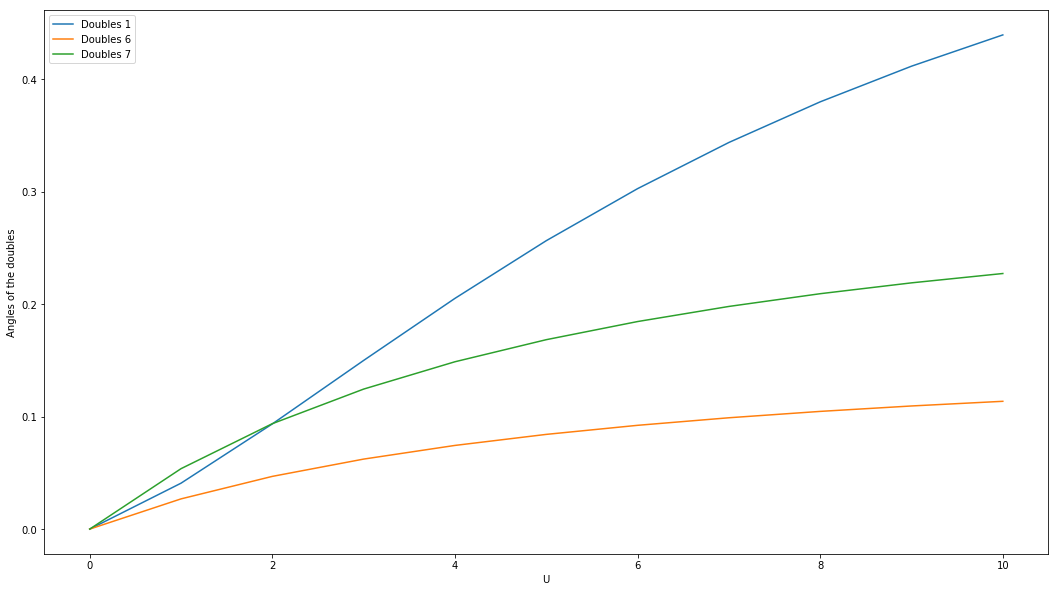

In [34]:
exact_angles[0] = 0
exact_angles_transpose = exact_angles.transpose()
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.plot(u_list, abs(exact_angles_transpose[0]), label = 'Doubles ' + str(1))
ax1.plot(u_list, abs(exact_angles_transpose[5]), label = 'Doubles ' + str(6))
ax1.plot(u_list, abs(exact_angles_transpose[6]), label = 'Doubles ' + str(7))
ax1.set_ylabel('Angles of the doubles')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()


In [35]:
exact_psi_doubles = []
for i in range(len(u_list)):
    exact_psi_doubles.append(np.dot(appdb(exact_angles[i]), uccket)) 

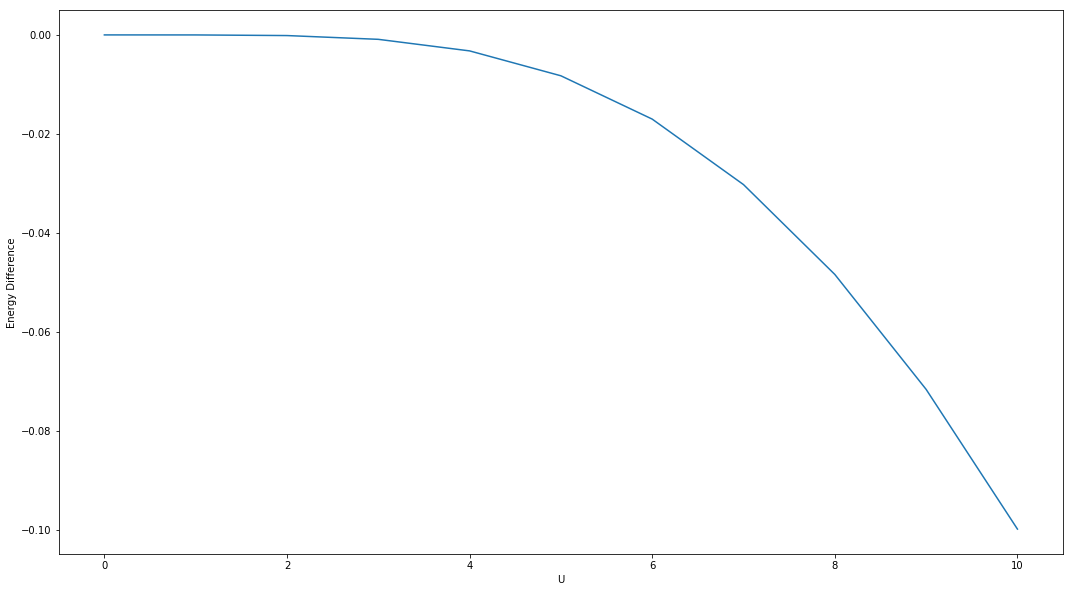

In [36]:
exact_variational_energy = []
for i in range((len(u_list))):
    exact_variational_energy.append(np.dot(exact_psi_doubles[i], np.dot(hamm(u_list[i]), exact_psi_doubles[i]))) #/ LA.norm(new_psi_doubles[i]))

exact_difference = []
for i in range(len(ge)):
    exact_difference.append(ge[i] - exact_variational_energy[i])
    
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.plot(u_list, exact_difference)
ax1.set_ylabel('Energy Difference')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
#plt.legend()
plt.show()

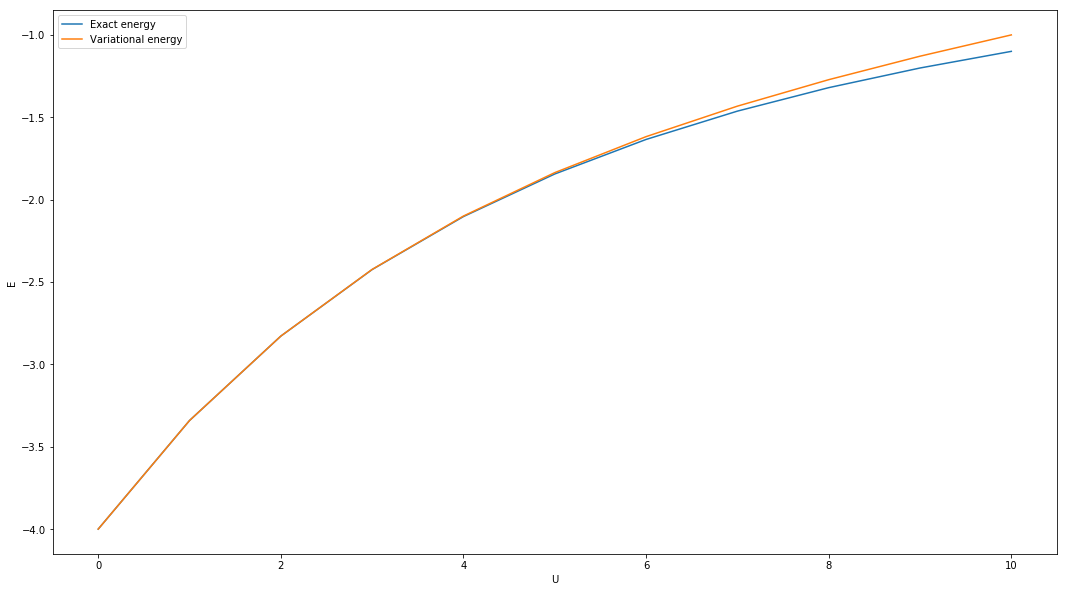

In [37]:
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.set_ylabel('E')
ax1.plot(u_list, ge, label = 'Exact energy')
ax1.plot(u_list, exact_variational_energy, label = 'Variational energy')
ax1.set_xlabel('U')
#ax1.sex_ylabel('E')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()

In [38]:
exact_psi_doubles[0] = gs_vector[0]
fidelity = []
for i in range(len(ge)):
    fidelity.append((np.dot(exact_psi_doubles[i], gs_vector[i])) ** 2)

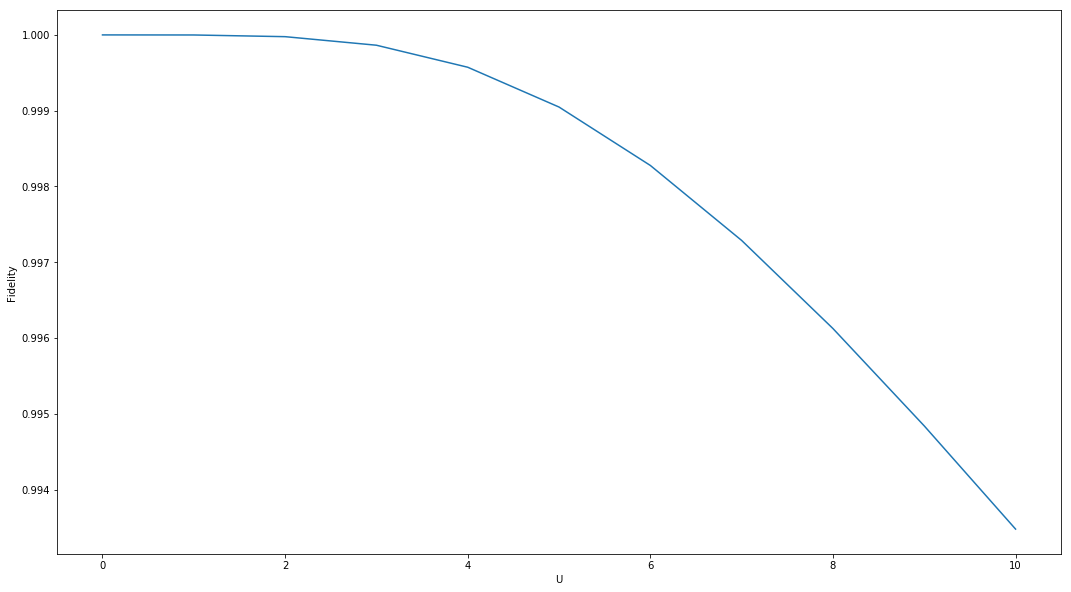

In [39]:
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.plot(u_list, fidelity)
ax1.set_ylabel('Fidelity')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
#plt.legend()
plt.show()

In [42]:
from sympy import Symbol, nsolve, sin, cos
import sympy
quad_angles = np.zeros([len(u_list), 10])
for i in range(len(u_list)):
    a = exact_psi_doubles[i][0]
    b = exact_psi_doubles[i][14]
    c = gs_vector[i][0]
    d = gs_vector[i][14]
    
    x1 = Symbol('x1')
    x2 = Symbol('x2')
    f1 = a*cos(x1)-b*sin(x2)-c
    f2 = b*cos(x2)-a*sin(x1)-d
    #print(nsolve((f1, f2), (x1, x2), (-1, 1)))
    quad_angles[i][3] = nsolve((f1, f2), (x1, x2), (0, 0))[1]
    if i == 0:
        quad_angles[i][3] = 0
    
    #quad_angles[i][3] = quad_angles[i][3] % (np.pi)
    
    quad_angles[i][0] = nsolve((f1, f2), (x1, x2), (-1, 1))[0]
    if i == 0:
        quad_angles[i][0] = 0
    if quad_angles[i][0] > 1:
        quad_angles[i][0] = abs(quad_angles[i][0]) - np.pi
    quad_angles[i][1] = np.arctan(1) + np.arctan(np.sqrt(2.0-(gs_vector[i][5] / exact_psi_doubles[i][5])**2) / (gs_vector[i][5] / exact_psi_doubles[i][5]))
    if quad_angles[i][1] > 1:
        quad_angles[i][1] = abs(quad_angles[i][1]) - np.pi/2.0
    
    #quad_angles[i][4] = quad_angles[i][5] = quad_angles[i][8] = quad_angles[i][1]
    quad_angles[i][7] = quad_angles[i][2] = 2*quad_angles[i][1]
    quad_angles[i][6] = quad_angles[i][0] 
    quad_angles[i][9] = quad_angles[i][3]


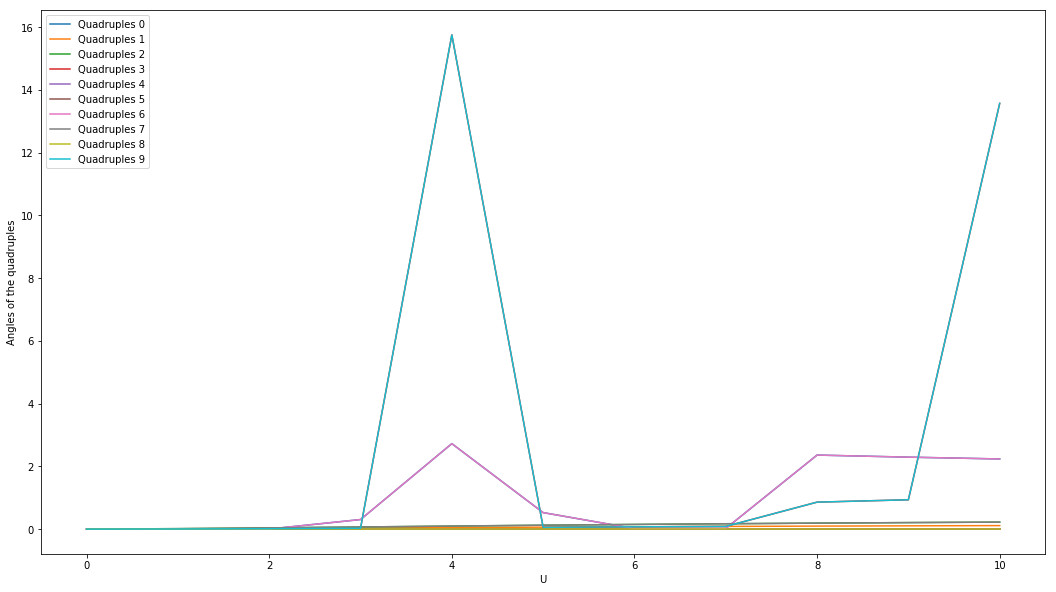

In [43]:
quad_angles_transpose = quad_angles.transpose()
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(quad_angles_transpose)):
    ax1.plot(u_list, abs(quad_angles_transpose[i]), label = 'Quadruples ' + str(i))
ax1.set_ylabel('Angles of the quadruples')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()

In [44]:
psi_quads = []
for i in range(len(u_list)):
    psi_quads.append(np.dot(appqp(quad_angles[i]), exact_psi_doubles[i]))
    psi_quads[i][20] = psi_quads[i][30] = psi_quads[i][15] = psi_quads[i][5]
    psi_quads[i][25] = psi_quads[i][10]
    psi_quads[i] = psi_quads[i] / LA.norm(psi_quads[i])

In [45]:
gs_vector[4],exact_psi_doubles[4], psi_quads[4]

(array([ 6.51854137e-01, -3.25086562e-17, -8.12604682e-17,  3.25100091e-16,
         7.71780256e-20,  9.71927776e-02,  1.60972659e-17, -4.02326601e-17,
        -2.10410837e-20, -4.15552183e-20,  1.94385555e-01, -8.25435890e-18,
         9.58472037e-17,  1.54506344e-20, -1.35674495e-01,  9.71927776e-02,
         6.04810680e-18,  4.19118973e-17, -2.01331099e-16,  3.05143258e-20,
         9.71927776e-02, -6.51854137e-01,  1.19447459e-17, -9.58472037e-17,
        -4.15552183e-20,  1.94385555e-01, -8.28532549e-18, -1.63693379e-17,
         4.02260546e-17,  2.10410837e-20,  9.71927776e-02,  6.04810680e-18,
        -5.10154360e-17,  5.80850891e-17, -1.54506344e-20,  1.35674495e-01]),
 array([-6.46087172e-01, -2.28823071e-17,  5.18693934e-17, -9.14644087e-19,
         8.43651831e-21, -1.02234591e-01,  1.82687695e-21, -1.43131534e-21,
        -3.51506740e-25, -1.05440819e-24, -2.04469181e-01, -5.19347183e-22,
         3.98554407e-21,  1.17153660e-28,  1.40925145e-01, -1.02234591e-01,
         2

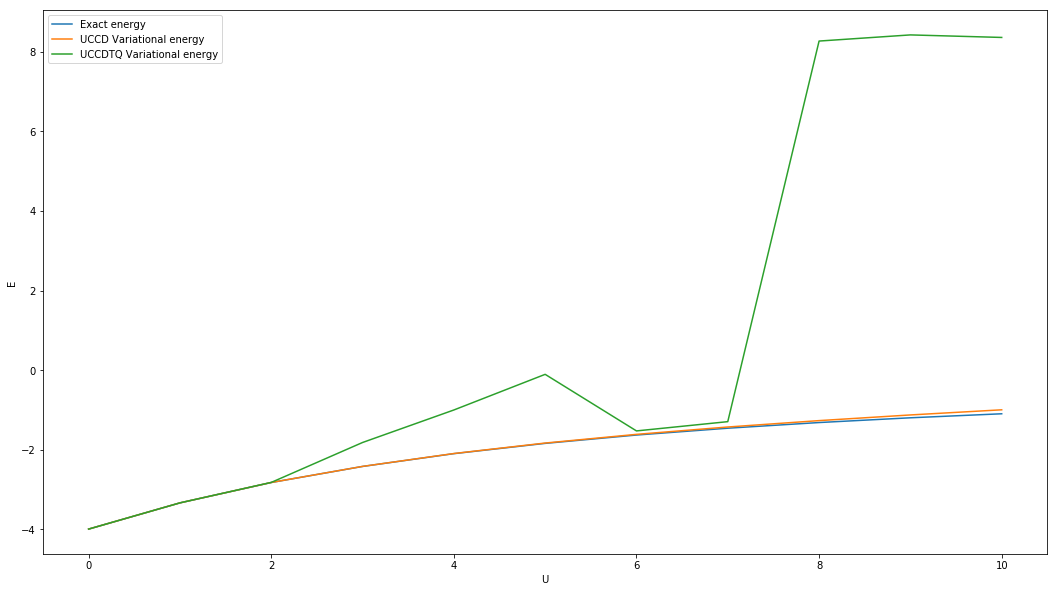

In [46]:
quad_variational_energy = []
for i in range((len(u_list))):
    quad_variational_energy.append(np.dot(psi_quads[i], np.dot(hamm(u_list[i]), psi_quads[i])))

quad_difference = []
for i in range(len(ge)):
    quad_difference.append(ge[i] - quad_variational_energy[i])
    
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.set_ylabel('E')
ax1.plot(u_list, ge, label = 'Exact energy')
ax1.plot(u_list, exact_variational_energy, label = 'UCCD Variational energy')
#ax1.plot(u_list, triples_variational_energy, label = 'UCCDT Variational energy')
ax1.plot(u_list, quad_variational_energy, label = 'UCCDTQ Variational energy')
ax1.set_xlabel('U')
#ax1.sex_ylabel('E')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()

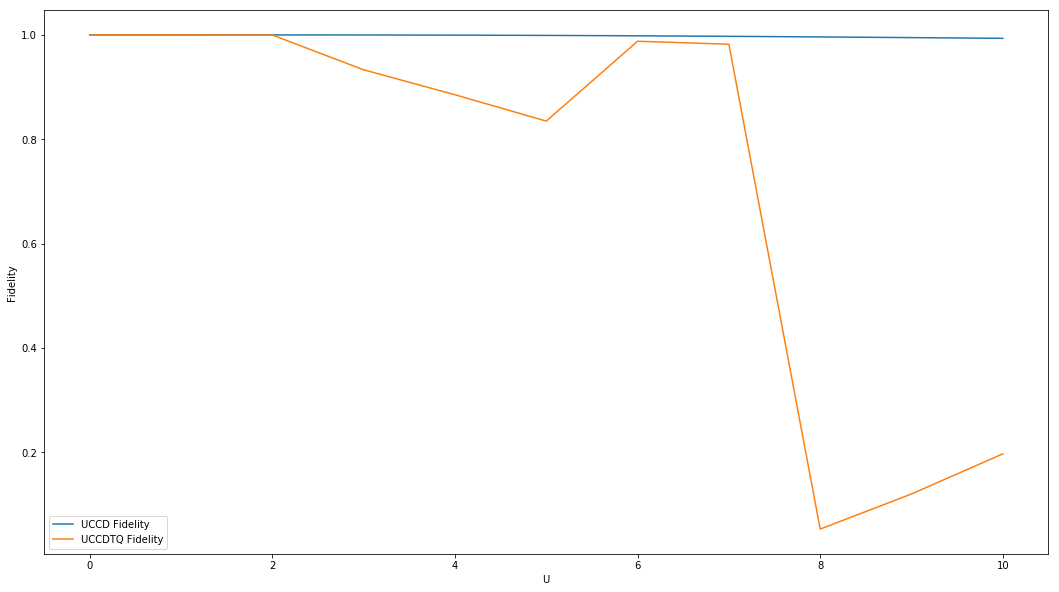

In [47]:
quads_fidelity = []
for i in range(len(ge)):
    quads_fidelity.append((np.dot(psi_quads[i], gs_vector[i])) ** 2)

fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.plot(u_list, fidelity, label = 'UCCD Fidelity')
#ax1.plot(u_list, triples_fidelity, label = 'UCCDT Fidelity')
ax1.plot(u_list, quads_fidelity, label = 'UCCDTQ Fidelity')
ax1.set_ylabel('Fidelity')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()

In [48]:
LA.norm(psi_quads[9])

0.9999999999999999

In [49]:
quad_difference, exact_difference

([-1.0153906604415397e-07,
  -0.00011996405029179869,
  -0.002038626053174397,
  -0.6021132097189841,
  -1.097992393472309,
  -1.7361842721982461,
  -0.10376019432056616,
  -0.1646668343212634,
  -9.594112339808124,
  -9.629431136866975,
  -9.464665476481244],
 [-1.0153906471188634e-07,
  -4.681153719321429e-06,
  -0.0001315171298816864,
  -0.0008936862245705335,
  -0.003230511097146227,
  -0.008262754112660309,
  -0.017017678381673562,
  -0.03025413880726302,
  -0.048410791205637294,
  -0.07163931402409385,
  -0.09987398818818538])